In [8]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('Datasets/SVM_Dataset1.csv', index_col=0)
df

,X1,X2,y
0,2.947814,6.626878,1
1,2.530388,7.785050,1
2,3.566991,5.651046,1
3,3.156983,5.467077,1
4,2.582346,4.457777,-1
5,2.155826,6.222343,-1
6,3.273418,3.520687,-1


In [17]:
# map 1's to H, and -1 to NH
# assign blue to H, and red to NH
# then make the scatter plot

# df['Healthy'] = ['H' for value in df['y'].values if value == 1 else 'NH' for value in df['y'].values]
df['Healthy'] = df['y'].map({1: 'H', -1: 'NH'})

In [18]:
df

,X1,X2,y,Healthy
0,2.947814,6.626878,1,H
1,2.530388,7.785050,1,H
2,3.566991,5.651046,1,H
3,3.156983,5.467077,1,H
4,2.582346,4.457777,-1,NH
5,2.155826,6.222343,-1,NH
6,3.273418,3.520687,-1,NH


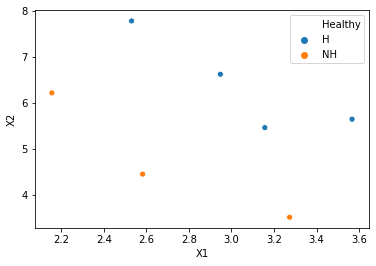

In [22]:
import seaborn as sns

sns.scatterplot(x=df['X1'], y=df['X2'], hue=df['Healthy'])

In [23]:
from sklearn import svm
# get training data
import numpy as np
X1=df['X1']
X2=df['X2']
X_train=np.array(list(zip(X1,X2)))
y_train=df['y'].values
# makeing the SVM
svm_classifier = svm.SVC(kernel='linear', C=10)
svm_classifier.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [24]:
# helper function to plot the best fit line
# as well as the marking the closest points
def plot_decision_boundary(clf, X, y):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max),np.arange(x2_min, x2_max))
    Z = clf.decision_function(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    plt.contour(xx1, xx2, Z, colors='b', levels=[-1, 0, 1], alpha=0.4, linestyles=['--', '-', '--'])
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

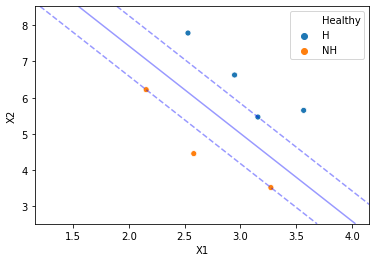

In [27]:
plot_decision_boundary(svm_classifier, X_train, y_train)
sns.scatterplot(x=df['X1'], y=df['X2'], hue=df['Healthy'])
plt.show()

In [29]:
# number of support vectors for each class
svm_classifier.n_support_

array([2, 1], dtype=int32)

In [31]:
# coordinates of support vectors
svm_classifier.support_vectors_

array([[2.155826, 6.222343],
       [3.273418, 3.520687],
       [3.156983, 5.467077]])

In [32]:
# Equation for the line: # ax1 + bx2 + c = 0
weight=svm_classifier.coef_
intercept=svm_classifier.intercept_
print(weight)  # a and b values
print(intercept) # c value

[[2.90336685 1.20121959]]
[-14.73321143]


In [35]:
# Activity: check the points (3, 5) and (2, 7.5) are very close to line
3*weight[0] + 5*weight[0] + intercept

array([ 8.49372337, -5.12345471])

In [37]:
# predict is (3,6) is depressed or healthy
3*weight[0] + 6*weight[0] + intercept

array([11.39709022, -3.92223512])

In [45]:
# prediction using SVM
print(svm_classifier.predict([[3, 6]])[0])

1


In [46]:
print(svm_classifier.predict([[2.5, 5]])[0])

-1


In [50]:
def svm_predict(x1, x2):
    '''Outputs depressed/healthy prediction for Brain dataset'''
    print(svm_classifier.predict([[x1, x2]])[0])  # 1 or -1

In [59]:
df = pd.read_csv('Datasets/SVM_Dataset2.csv')

In [60]:
df

,x1,x2,y
0,7.0,20,-1
1,8.0,12,-1
2,9.0,19,-1
3,10.0,17,-1
4,11.0,15,-1
5,13.0,14,-1
6,14.0,12,-1
7,15.0,14,-1
8,15.0,17,-1
9,16.0,16,-1


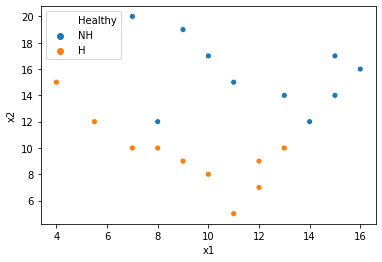

In [62]:
df['Healthy'] = df['y'].map({1: 'H', -1: 'NH'})
sns.scatterplot(x=df['x1'], y=df['x2'], hue=df['Healthy'])

In [63]:
svm_classifier = svm.SVC(kernel='poly', C=10)

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# from sklearn docs: we create two clusters of random points
# https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane_unbalanced.html
n_samples_1 = 1000
n_samples_2 = 100
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]
X, y = make_blobs(n_samples=[n_samples_1, n_samples_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)

In [72]:
clf = svm.SVC(kernel='linear', C=1.0)
wclf = svm.SVC(kernel='linear', class_weight={1: 10})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [74]:
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [75]:
wclf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight={1: 10}, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [79]:
# error rate
y_pred = clf.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error
r2_score(y_test, y_pred)

0.14082840236686378

In [81]:
mean_squared_error(y_test, y_pred)

0.05509641873278237

In [82]:
y_pred = wclf.predict(X_test)
r2_score(y_test, y_pred)

-1.0190532544378699

In [83]:
mean_squared_error(y_test, y_pred)

0.12947658402203857

In [85]:
y_pred = clf.predict(X_test)
misclassified = 0
for i, j in zip(y_pred, y_test):
    if i != j:
        misclassified += 1
        
print(misclassified/len(y_test))

0.05509641873278237


In [86]:
y_pred = wclf.predict(X_test)
misclassified = 0
for i, j in zip(y_pred, y_test):
    if i != j:
        misclassified += 1
        
print(misclassified/len(y_test))

0.12947658402203857


In [ ]:
n1, n2, n3, n4 = 0, 0, 0, 